## Assignment 2 Solutions

In [2]:
#@title Import { display-mode: "form" }

!pip install pomegranate

import io
import os
import sys
import glob
import warnings

from google.colab import files

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import seaborn as sns; sns.set()

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from pomegranate import *

%matplotlib inline

     |████████████████████████████████| 5.3MB 7.7MB/s 


### Question 2 Hidden Markov model

Read https://towardsdatascience.com/hidden-markov-models-for-time-series-classification-basic-overview-a59b74e5e65b and implement the following: generate the input sequences in Python that correspond to the data sequence presented on this page. Implement HMM that correspond to the model described on that Web site – you can train it yourself based on examples below or you can use the model from the website:<br>

<img src="https://miro.medium.com/max/2620/1*iw6EqReywjLEH3cdbg1l7w.png" width="360" align="center"/>

Analyze the likelihood of a given path by doing computations in Python. What does this likelihood result mean?<br>
To learn more about this problem of reading sign language read https://machinelearnings.co/sign-language-recognition-with-hmms-504b86a2acde.<br>
For the implementation of HMMs take a look at: Analyze the first part of the example https://medium.com/@kangeugine/hidden-markov-model-7681c22f5b9<br> 
as well as https://pomegranate.readthedocs.io/en/latest/HiddenMarkovModel.html <br>and https://github.com/jmschrei/pomegranate/tree/master/tutorials. 

**Solution:** <br>

In [4]:
# Input sequences
example1 = np.array([4,4,4,5,5,5,6,6,6,1,1,1,2,3,3])
example2 = np.array([4,4,2,4,4,1,-1,1,1,3,3])
example3 = np.array([3,4,3,4,3,4,1,2,2,2,2,2])

# Initialize the states
s1 = State(NormalDistribution(5, 2), name="s1")
s2 = State(NormalDistribution(1, 1), name="s2")
s3 = State(NormalDistribution(3, 3), name="s3")

# Buil the model
model = HiddenMarkovModel()
model.add_states([s1, s2, s3])

# Define the transition matrix
model.add_transition(model.start, s1, 1.0)
model.add_transition(s1, s1, 0.85)
model.add_transition(s1, s2, 0.15)
model.add_transition(s2, s2, 0.7)
model.add_transition(s2, s3, 0.3)
model.add_transition(s3, s3, 0.625)
model.add_transition(s3, model.end, 0.375)
model.bake()

# Train the model
model.fit([example1, example2, example3], max_iterations=5)

{
    "class" : "HiddenMarkovModel",
    "name" : "None",
    "start" : {
        "class" : "State",
        "distribution" : null,
        "name" : "None-start",
        "weight" : 1.0
    },
    "end" : {
        "class" : "State",
        "distribution" : null,
        "name" : "None-end",
        "weight" : 1.0
    },
    "states" : [
        {
            "class" : "State",
            "distribution" : {
                "class" : "Distribution",
                "name" : "NormalDistribution",
                "parameters" : [
                    4.197035765812473,
                    1.0336794016990756
                ],
                "frozen" : false
            },
            "name" : "s1",
            "weight" : 1.0
        },
        {
            "class" : "State",
            "distribution" : {
                "class" : "Distribution",
                "name" : "NormalDistribution",
                "parameters" : [
                    0.8517703567033743,
                    0

In [7]:
# Compute the log likelihood of example 1
seq = example1
likelihood = model.log_probability(seq)

print("The log likelihood of example 1 is:", likelihood)

The log likelihood of example 1 is: -25.080227981584045


When path is provided, the result means the log probability of that sequence given the path.

### Question 3 k-means and Gaussian mixtures

Read about k-means at https://medium.com/machine-learning-algorithms-from-scratch/k-means-clustering-from-scratch-in-python-1675d38eee42. Download the files and the code from https://github.com/pavankalyan1997/Machine-learning-without-any-libraries/tree/master/2.Clustering/1.K_Means_Clustering . Modify the code to perform clustering using Gaussian mixtures. Compare results based on the SSE (sum squared error), cluster means, within cluster standard deviations for each attribute.

**Solution:** <br>

1.  K-Means

a) Load and explore the dataset

In [0]:
# Load the dataset
uploaded = files.upload()
dataset = pd.read_csv(io.BytesIO(uploaded['Mall_Customers.csv']))

# Show the description of the dataset
dataset.describe()

Saving Mall_Customers.csv to Mall_Customers.csv


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


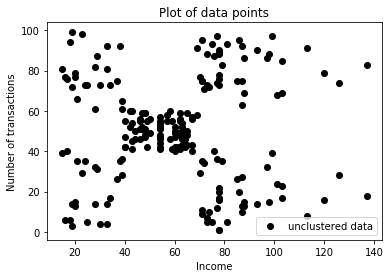

In [0]:
# Build our dataset using Annual Income and Spending score
X = dataset.iloc[:, [3, 4]].values

# Number of training examples
m = X.shape[0] # m = 200

# Number of features
n = X.shape[1] # n = 2

# Number of iterations
n_iter = 100

# Visualizing the dataset
plt.scatter(X[:,0],X[:,1],c='black',label='unclustered data')
plt.xlabel('Income')
plt.ylabel('Number of transactions')
plt.legend()
plt.title('Plot of data points')
plt.show()

b) Using the elbow method to find the optimal number of clusters

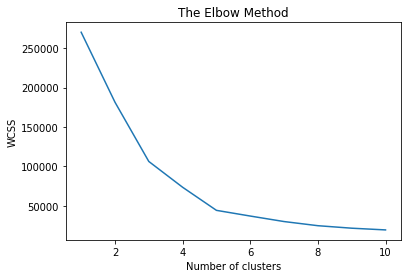

In [0]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Based on these observations we choose 5 as optimum number of clusters.

In [0]:
# Number of clusters
K = 5

c) Fitting K-Means to the dataset

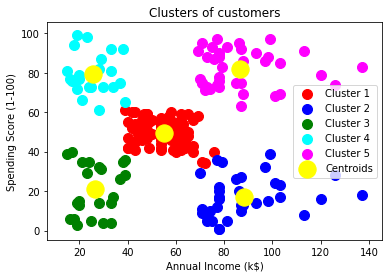

In [0]:
# K-Means clustering
kmeans = KMeans(n_clusters = K, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

d) Evaluate the model

In [0]:
print("Here are the evaluations of K-Means Model:\n")

# Compute SSE
sse = kmeans.inertia_
print("SSE of the model is: {:.2f}".format(sse))

# Compute cluster means and within cluster standard deviations
c_means = kmeans.cluster_centers_

c1_mean = c_means[0]
c1_std = np.std(X[y_kmeans == 0])
print("\nCluster Means of cluster 1 is:", c1_mean)
print("Within cluster standard deviations of cluster 1 is: {:.2f}".format(c1_std))

c2_mean = c_means[1]
c2_std = np.std(X[y_kmeans == 1])
print("\nCluster Means of cluster 2 is:", c2_mean)
print("Within cluster standard deviations of cluster 2 is: {:.2f}".format(c2_std))

c3_mean = c_means[2]
c3_std = np.std(X[y_kmeans == 2])
print("\nCluster Means of cluster 3 is:", c3_mean)
print("Within cluster standard deviations of cluster 3 is: {:.2f}".format(c3_std))

c4_mean = c_means[3]
c4_std = np.std(X[y_kmeans == 3])
print("\nCluster Means of cluster 4 is:", c4_mean)
print("Within cluster standard deviations of cluster 4 is: {:.2f}".format(c4_std))

c5_mean = c_means[4]
c5_std = np.std(X[y_kmeans == 4])
print("\nCluster Means of cluster 5 is:", c5_mean)
print("Within cluster standard deviations of cluster 5 is: {:.2f}".format(c5_std))

Here are the evaluations of K-Means Model:

SSE of the model is: 44448.46

Cluster Means of cluster 1 is: [55.2962963  49.51851852]
Within cluster standard deviations of cluster 1 is: 8.32

Cluster Means of cluster 2 is: [88.2        17.11428571]
Within cluster standard deviations of cluster 2 is: 37.97

Cluster Means of cluster 3 is: [26.30434783 20.91304348]
Within cluster standard deviations of cluster 3 is: 10.87

Cluster Means of cluster 4 is: [25.72727273 79.36363636]
Within cluster standard deviations of cluster 4 is: 28.27

Cluster Means of cluster 5 is: [86.53846154 82.12820513]
Within cluster standard deviations of cluster 5 is: 13.31


2. Gaussian Mixtures

a) Load and explore the dataset

In [0]:
# Load the dataset
uploaded = files.upload()
dataset = pd.read_csv(io.BytesIO(uploaded['Mall_Customers.csv']))

# Show the description of the dataset
dataset.describe()

Saving Mall_Customers.csv to Mall_Customers.csv


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


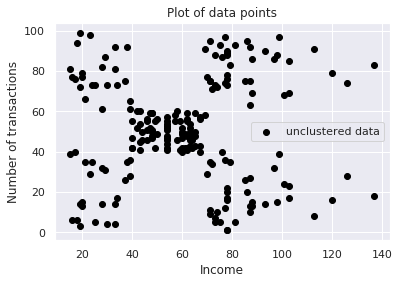

In [0]:
# Build our dataset using Annual Income and Spending score
X = dataset.iloc[:, [3, 4]].values

# Number of training examples
m = X.shape[0] # m = 200

# Number of features
n = X.shape[1] # n = 2

# Number of iterations
n_iter = 100

# Visualizing the dataset
plt.scatter(X[:,0],X[:,1],c='black',label='unclustered data')
plt.xlabel('Income')
plt.ylabel('Number of transactions')
plt.legend()
plt.title('Plot of data points')
plt.show()

b) Using the  Akaike information criterion (AIC) and the Bayesian information criterion (BIC) to find the optimal number of clusters

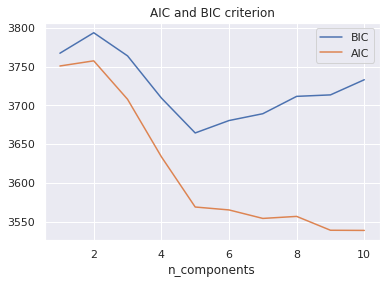

In [0]:
n_components = np.arange(1, 11)

models = [GaussianMixture(n, covariance_type='full', random_state=42).fit(X)
          for n in n_components]

plt.plot(n_components, [m.bic(X) for m in models], label='BIC')
plt.plot(n_components, [m.aic(X) for m in models], label='AIC')
plt.title('AIC and BIC criterion')
plt.legend(loc='best')
plt.xlabel('n_components');

The optimal number of clusters is the value that minimizes the AIC or BIC, depending on which approximation we wish to use.  The AIC tells us that our choice of 10 components above was probably too many: around 4-8 components would have been a better choice. As is typical with this sort of problem, the BIC recommends a simpler model. So that we can choose 5 as optimum number of clusters.

In [0]:
# Number of clusters
K = 5

c) Fitting Gaussian Mixtures to the dataset

In [0]:
# Gaussian Mixtures clustering
gmm = GaussianMixture(n_components=K, covariance_type='full', random_state = 42).fit(X)
labels = gmm.predict(X)

In [0]:
def draw_ellipse(position, covariance, ax=None, **kwargs):
  """Draw an ellipse with a given position and covariance"""
  ax = ax or plt.gca()
    
  # Convert covariance to principal axes
  if covariance.shape == (2, 2):
    U, s, Vt = np.linalg.svd(covariance)
    angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
    width, height = 2 * np.sqrt(s)
  else:
    angle = 0
    width, height = 2 * np.sqrt(covariance)
    
  # Draw the Ellipse
  for nsig in range(1, 4):
    ax.add_patch(Ellipse(position, nsig * width, nsig * height, angle, **kwargs))

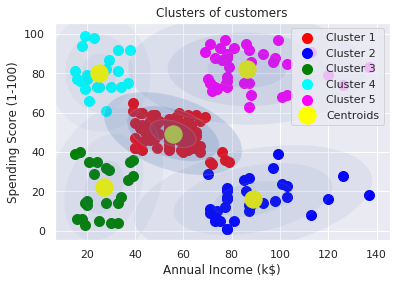

In [0]:
# Visualising the clusters
plt.scatter(X[labels == 0, 0], X[labels == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[labels == 1, 0], X[labels == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[labels == 2, 0], X[labels == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[labels == 3, 0], X[labels == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[labels == 4, 0], X[labels == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(gmm.means_[:, 0], gmm.means_[:, 1], s = 300, c = 'yellow', label = 'Centroids')

w_factor = 0.2 / gmm.weights_.max()
for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
  draw_ellipse(pos, covar, alpha=w * w_factor)

plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

d) Evaluate the model

In [0]:
print("Here are the evaluations of Gaussian Mixtures Model:\n")

# Compute SSE
sse = np.sum(gmm.covariances_)
print("SSE of the model is: {:.2f}".format(sse))

# Compute cluster means and within cluster standard deviations
c_means = gmm.means_

c1_mean = c_means[0]
c1_std = np.std(X[labels == 0])
print("\nCluster Means of cluster 1 is:", c1_mean)
print("Within cluster standard deviations of cluster 1 is: {:.2f}".format(c1_std))

c2_mean = c_means[1]
c2_std = np.std(X[labels == 1])
print("\nCluster Means of cluster 2 is:", c2_mean)
print("Within cluster standard deviations of cluster 2 is: {:.2f}".format(c2_std))

c3_mean = c_means[2]
c3_std = np.std(X[labels == 2])
print("\nCluster Means of cluster 3 is:", c3_mean)
print("Within cluster standard deviations of cluster 3 is: {:.2f}".format(c3_std))

c4_mean = c_means[3]
c4_std = np.std(X[labels == 3])
print("\nCluster Means of cluster 4 is:", c4_mean)
print("Within cluster standard deviations of cluster 4 is: {:.2f}".format(c4_std))

c5_mean = c_means[4]
c5_std = np.std(X[labels == 4])
print("\nCluster Means of cluster 5 is:", c5_mean)
print("Within cluster standard deviations of cluster 5 is: {:.2f}".format(c5_std))

Here are the evaluations of Gaussian Mixtures Model:

SSE of the model is: 1351.35

Cluster Means of cluster 1 is: [55.710366   49.40699488]
Within cluster standard deviations of cluster 1 is: 8.95

Cluster Means of cluster 2 is: [88.81300265 16.12462277]
Within cluster standard deviations of cluster 2 is: 38.74

Cluster Means of cluster 3 is: [27.03119094 22.16675827]
Within cluster standard deviations of cluster 3 is: 10.87

Cluster Means of cluster 4 is: [25.11748524 80.12817162]
Within cluster standard deviations of cluster 4 is: 28.80

Cluster Means of cluster 5 is: [86.24063303 82.02037464]
Within cluster standard deviations of cluster 5 is: 13.31


3. Analysis

Based on our results, we can notice that SSE of the Gaussian Mixtures Clustering is musch less than K-Means Clustering, which means that Gaussian Mixtures have overall better performance than K-Means. However, for std within each clusters, we can notice K-Means fits slightly better, this means K-Means fit data better locally, that's maybe because Gaussian Mixtures is a kind of Generative model.

But we can find that, compare to K-Means, Gaussian Mixtures has 2 obvious advantages:<br>
1) Gaussian Mixtures can give probabilistic cluster assignment<br>
2) Gaussian Mixtures has more flexibility in cluster shape

### Question 4 Markov chains

If “whether tomorrow is raining” is only related with the weather of today, and suppose the probability of “Both of today and tomorrow are raining” is 0.8; the probability of “Neither today nor tomorrow is raining” is 0.7. The state of raining or not on any given day is 1 and 0, respectively. 

(1) Is “whether it’s raining on any given day” a Markov chain. If yes, find the matrix of transition probability. 

**Solution:** <br>
Yes, “whether it’s raining on any given day” is a Markov chain, and it and be represented as graphical model shown below:<br>

<img src="https://github.com/ShawnSerendipity/ELG-7172-Uncertainty-Evaluation-in-Engineering-Measurements-and-Machine-Learning/blob/master/Assignment2-Figure1.png?raw=true" width="360" align="center"/>

Matrix of transition probability is:

$ P = 
  \begin{pmatrix}
  0.7 & 0.3 \\
  0.2 & 0.8 
  \end{pmatrix}
$

<br>
<br>

(2) Find the probability of “Day 3” is raining, given “Day 1” is raining.

**Solution:** <br>
Sate from day 1 to day 3 can be represented as below:<br>

<img src="https://github.com/ShawnSerendipity/ELG-7172-Uncertainty-Evaluation-in-Engineering-Measurements-and-Machine-Learning/blob/master/Assignment2-Figure2.png?raw=true" width="360" align="center"/>

So, probability of “Day 3” is raining, given “Day 1” is raining can be calculated as:<br>
$ p(Day 3 = 1 | Day = 1) = 0.2 \times 0.3 + 0.8 \times 0.8 = 0.7 $

<br>
<br>

(3) Program this Markov chain. You can use Markov Chain implementation of pomegranate https://github.com/jmschrei/pomegranate/tree/master/tutorials

**Solution:** <br>

In [0]:
class MarkovChain(object):
    def __init__(self, transition_prob):
        """
        Initialize the MarkovChain instance.
 
        Parameters
        ----------
        transition_prob: dict
            A dict object representing the transition 
            probabilities in Markov Chain. 
            Should be of the form: 
                {'state1': {'state1': 0.1, 'state2': 0.4}, 
                 'state2': {...}}
        """
        self.transition_prob = transition_prob
        self.states = list(transition_prob.keys())
 
    def next_state(self, current_state):
        """
        Returns the state of the random variable at the next time 
        instance.
 
        Parameters
        ----------
        current_state: str
            The current state of the system.
        """
        return np.random.choice(
            self.states, 
            p=[self.transition_prob[current_state][next_state] 
               for next_state in self.states]
        )
 
    def generate_states(self, current_state, no=10):
        """
        Generates the next states of the system.
 
        Parameters
        ----------
        current_state: str
            The state of the current random variable.
 
        no: int
            The number of future states to generate.
        """
        future_states = []
        for i in range(no):
            next_state = self.next_state(current_state)
            future_states.append(next_state)
            current_state = next_state
        return future_states

In [0]:
# Define the transition matrix
transition_prob = {'Not Raining': {'Not Raining': 0.7, 'Raining': 0.3},
                   'Raining': {'Not Raining': 0.2, 'Raining': 0.8}}

# Build the markov chain 
weather_chain = MarkovChain(transition_prob=transition_prob)

# Generate next 10 states given raining now 
next_states = weather_chain.generate_states(current_state='Raining', no=10)
print("Generate next 10 states given raining now:\n", next_states)

Generate next 10 states given raining now:
 ['Raining', 'Raining', 'Raining', 'Raining', 'Raining', 'Raining', 'Raining', 'Raining', 'Raining', 'Raining']
